In [1]:
import os
import io
import re
import numpy as np

def import_data():
    ham_list = []
    spam_list = []

    for filename in os.listdir("./data/email/ham/"):
        f = open("./data/email/ham/" + filename, mode="r", encoding="latin-1")
        ham_list.append(f.read())

    for filename in os.listdir("./data/email/spam/"):
        f = open("./data/email/spam/" + filename, mode="r", encoding="latin-1")
        spam_list.append(f.read())
    return ham_list, spam_list  

def textParse(bigString):
    listOfTokens = re.split('\W+', bigString)
    regex = re.compile('[0-9]+')  # filter out words with numbers
    return [tok.lower() for tok in listOfTokens if (len(tok) > 2 and not regex.search(tok))]   

def createDataSet(ham_list, spam_list):
    train_ham_list = ham_list[:len(ham_list)*8//10]
    test_ham_list = ham_list[len(ham_list)*8//10:]
    train_spam_list = spam_list[:len(spam_list)*8//10]
    test_spam_list = spam_list[len(spam_list)*8//10:]
    listOfPost = []
    listOfClass = []
    listOfTestPost = []
    listOfTestClass = []
    for post in train_ham_list:
        listOfPost.append(post)
        listOfClass.append(0) # 0 is ham, 1 is spam
    for post in train_spam_list:
        listOfPost.append(post)
        listOfClass.append(1)
    for post in test_ham_list:
        listOfTestPost.append(post)
        listOfTestClass.append(0) 
    for post in test_spam_list:
        listOfTestPost.append(post)
        listOfTestClass.append(1)
    # todo: shuffle list
    return listOfPost, listOfClass, listOfTestPost, listOfTestClass

In [2]:
ham_list, spam_list = import_data()
listOfPost, listOfClass,listOfTestPost, testClass = createDataSet(ham_list, spam_list)

In [3]:
# vectorize documents
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [4]:
model.fit(listOfPost, listOfClass)
labels = model.predict(listOfTestPost)

Text(89.18, 0.5, 'predicted label')

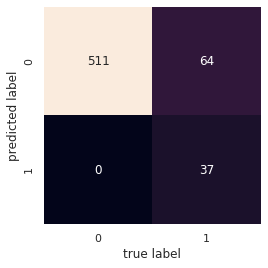

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testClass, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [6]:
mat

array([[511,   0],
       [ 64,  37]])